# Consigna:
- Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
    - (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
    - (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen `coca_multi.png` con el mismo témplate del ítem 1
    - (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes
- Visualizarlos resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección

# Resolución
## Importación de librerías públicas

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Importación de módulos codeados en el repo

In [2]:
# Set path to reach src folder
import sys

sys.path.append("../")

In [3]:
from src.pattern_utils import detect_single_pattern, tform_gauss_border_filter

from src.img_utils import load_as_RGB

### Visualizacion de imágenes y plantilla

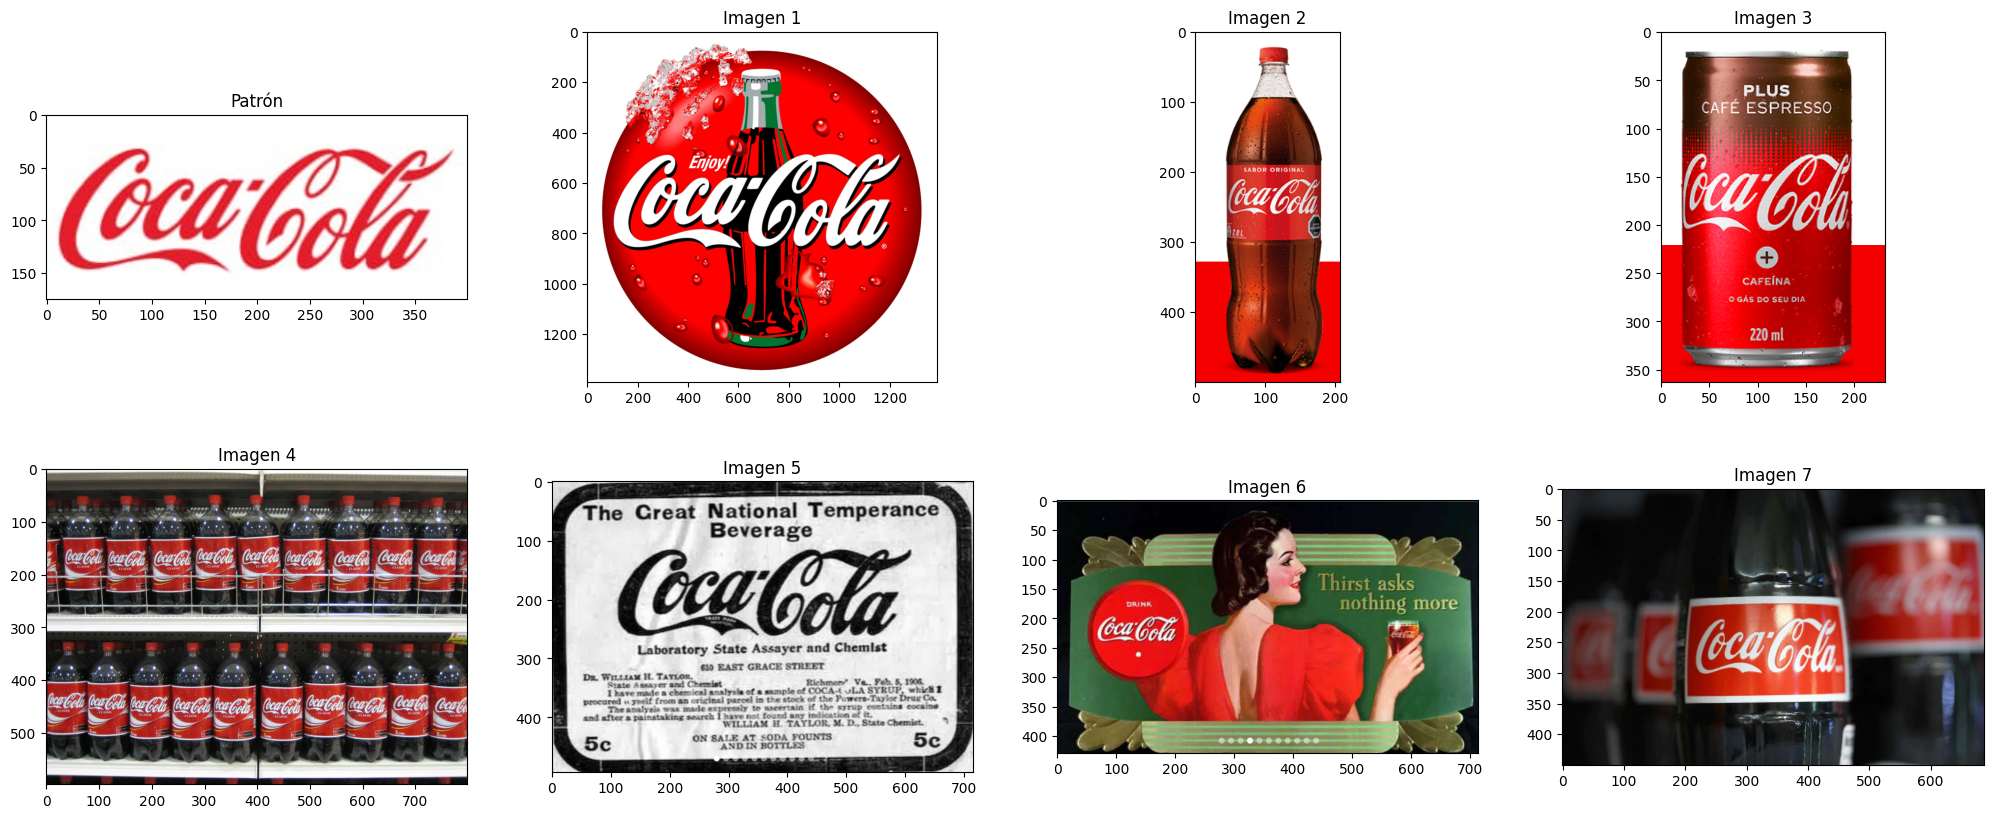

In [4]:
img1 = load_as_RGB("resources/images/COCA-COLA-LOGO.jpg")
img2 = load_as_RGB("resources/images/coca_logo_1.png")
img3 = load_as_RGB("resources/images/coca_logo_2.png")
img4 = load_as_RGB("resources/images/coca_multi.png")
img5 = load_as_RGB("resources/images/coca_retro_1.png")
img6 = load_as_RGB("resources/images/coca_retro_2.png")
img7 = load_as_RGB("resources/images/logo_1.png")
ptrn = load_as_RGB("resources/template/pattern.png")

# Show images in three rows
fig, axes = plt.subplots(2, 4, figsize=(25, 10))

axes[0][0].imshow(ptrn)
axes[0][0].set_title("Patrón")

for i, img in enumerate([img1, img2, img3, img4, img5, img6, img7]):
    ax = axes[int((i + 1) / 4)][(i + 1) % 4]
    ax.imshow(img)
    ax.set_title(f"Imagen {i+1}")

### Detección única del logo en las imágenes
Para poder hacer detecciones de todas las imágenes, será necesario aplicar un filtro de bordes

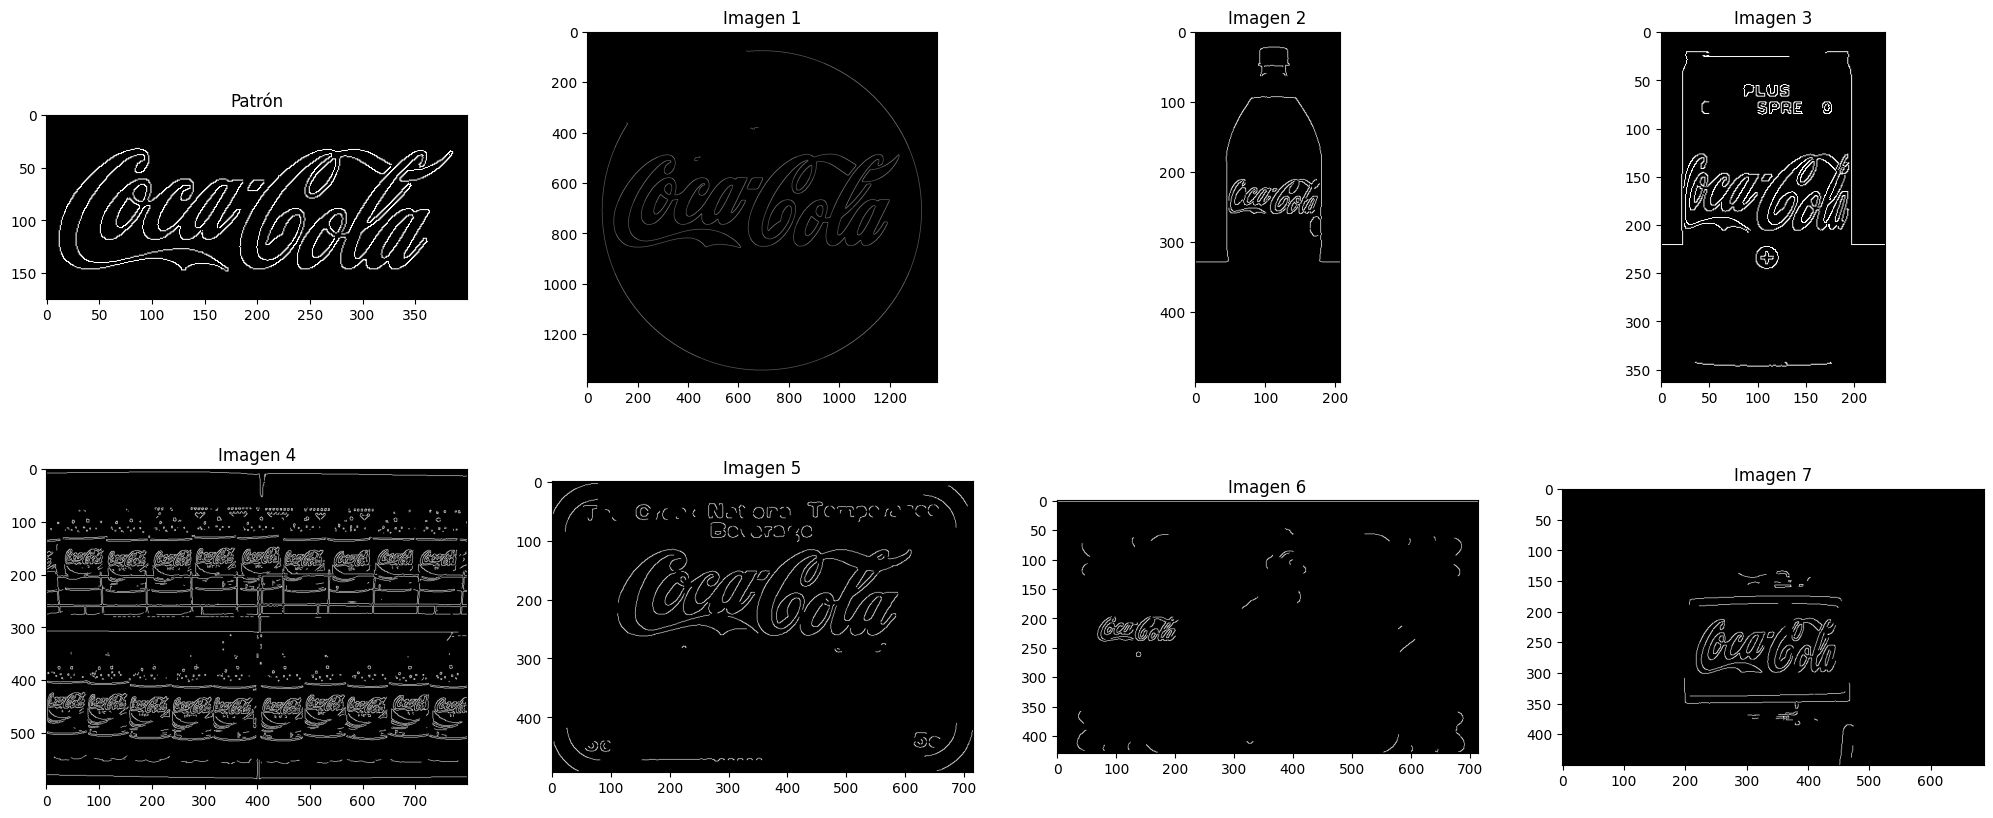

In [75]:
img1_b = tform_gauss_border_filter(img1, 7, 300, 550, 100)
img2_b = tform_gauss_border_filter(img2, 3, 300, 550)
img3_b = tform_gauss_border_filter(img3, 5, 100, 400)
img4_b = tform_gauss_border_filter(img4, 1, 300, 450)
img5_b = tform_gauss_border_filter(img5, 9, 300, 400)
img6_b = tform_gauss_border_filter(img6, 5, 300, 450)
img7_b = tform_gauss_border_filter(img7, 5, 200, 270)
ptrn_b = tform_gauss_border_filter(ptrn, 3, 1, 100)

# Show images in three rows
fig, axes = plt.subplots(2, 4, figsize=(25, 10))

axes[0][0].imshow(ptrn_b, cmap="gray")
axes[0][0].set_title("Patrón")

for i, img in enumerate([img1_b, img2_b, img3_b, img4_b, img5_b, img6_b, img7_b]):
    ax = axes[int((i + 1) / 4)][(i + 1) % 4]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Imagen {i+1}")

In [55]:
 # Llamar a la función detect_logo_multiscale con imágenes en formato RGB
result_image, bounding_boxes = detect_single_pattern(ptrn_b, img2_b, img2, template_scale=1)

# Visualizar resultados
plt.imshow(result_image)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\templmatch.cpp:1175: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'cv::matchTemplate'
